In [5]:
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/')

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_breast_cancer
cancer_ds = load_breast_cancer()
print(cancer_ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
cancer_ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
df = pd.DataFrame(data=cancer_ds['data'], columns=cancer_ds['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
print(scaled_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
data_pca=pca.fit_transform(scaled_data)
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]], shape=(569, 2))

In [16]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second Principal Component')

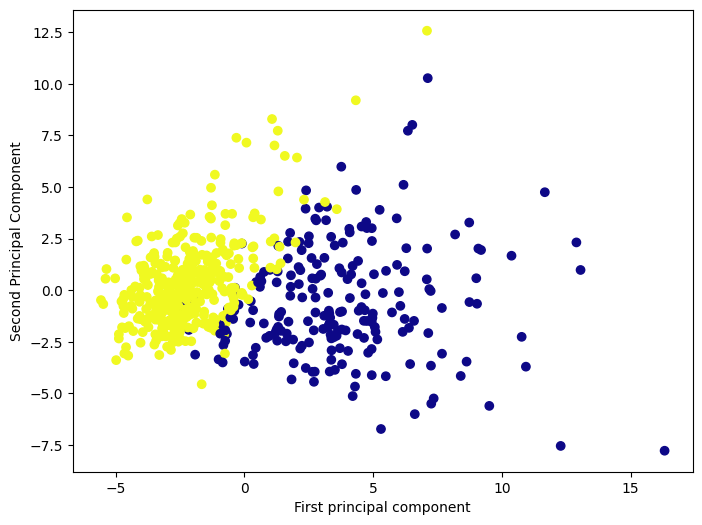

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=cancer_ds['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

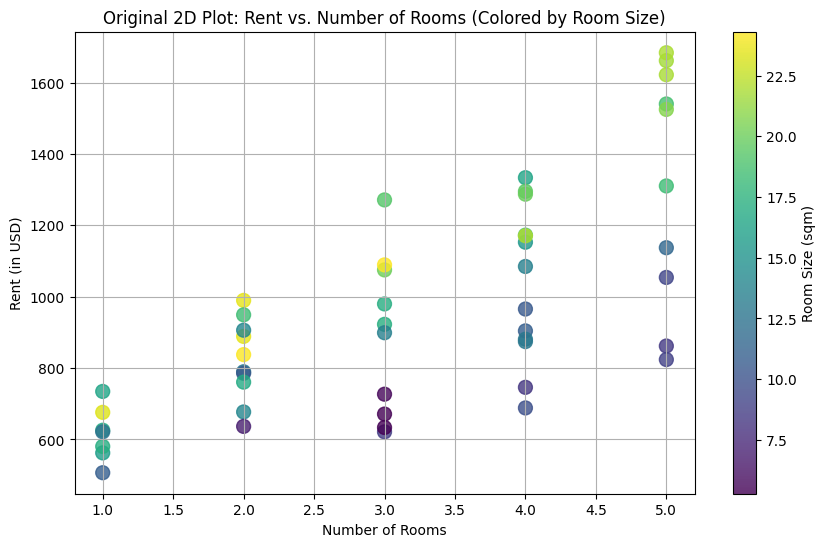

Explained Variance Ratio of the 1st Principal Component: 0.52
This component captures the majority of the information from both original features.




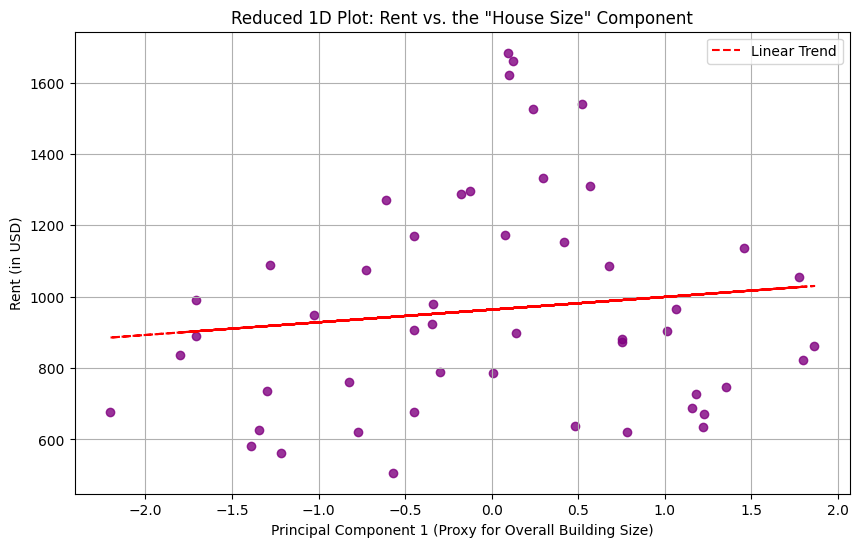

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Create Synthetic Data
# Let's assume Rent is dependent on both the number of rooms and the average room size.
# We'll generate data that shows a clear relationship.
np.random.seed(42)
num_samples = 50
num_rooms = np.random.randint(1, 6, size=num_samples)
room_size_sqm = np.random.uniform(5, 25, size=num_samples)
house_size = num_rooms * room_size_sqm

# Rent is a function of the combined "house size" with some noise
rent = 500 + 10 * house_size + np.random.normal(loc=0, scale=100, size=num_samples)

# Combine independent features for PCA
independent_features = np.vstack([num_rooms, room_size_sqm]).T

# 2. Visualize the Original Problem (Before Reduction)
plt.figure(figsize=(10, 6))
plt.scatter(num_rooms, rent, c=room_size_sqm, cmap='viridis', s=100, alpha=0.8)
plt.title('Original 2D Plot: Rent vs. Number of Rooms (Colored by Room Size)')
plt.xlabel('Number of Rooms')
plt.ylabel('Rent (in USD)')
plt.colorbar(label='Room Size (sqm)')
plt.grid(True)
plt.show()

# The above plot shows a relationship, but it's hard to quantify how both
# 'Number of Rooms' and 'Room Size' together influence 'Rent'.

# 3. Perform Dimensionality Reduction using PCA
# Standardize the features before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(independent_features)

# Apply PCA to reduce the 2 features to 1 principal component
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_features)

# The new single feature is our "House Size" proxy
print(f"Explained Variance Ratio of the 1st Principal Component: {pca.explained_variance_ratio_[0]:.2f}")
print("This component captures the majority of the information from both original features.")
print("\n")

# 4. Visualize the Reduced Problem (After Reduction)
plt.figure(figsize=(10, 6))
plt.scatter(principal_components, rent, color='purple', alpha=0.8)
plt.title('Reduced 1D Plot: Rent vs. the "House Size" Component')
plt.xlabel('Principal Component 1 (Proxy for Overall Building Size)')
plt.ylabel('Rent (in USD)')

# Optional: Add a linear regression line to show the clear relationship
z = np.polyfit(principal_components.flatten(), rent, 1)
p = np.poly1d(z)
plt.plot(principal_components, p(principal_components), "r--", label='Linear Trend')
plt.legend()
plt.grid(True)
plt.show()

# This final plot shows the relationship on a single axis,
# making it a much simpler and clearer visualization.
